In [1]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Dataset

In [48]:
tweet_df = pd.read_csv('https://raw.githubusercontent.com/h3rry/learning_ai/main/projects/sentiment/tweet.csv')
tweet_df = tweet_df.copy()
tweet_df['tweet'] = tweet_df['tweet'].fillna('')
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


In [99]:
tweet_df.head()

,Unnamed: 0,sentimen,tweet,cleaned_data,polarity,polarity_encoded
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing ber...,Neutral,1
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,Neutral,1
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,Neutral,1
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian game berdampak pd ...,Weakly Negative,5
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,Neutral,1


In [51]:
tweet_df['sentimen'].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

# DATA CLEANING

## Data Preparation

### Clean Data

In [52]:
import re

def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df['tweet'].apply(clean_data)
tweet_df.head()

,Unnamed: 0,sentimen,tweet,cleaned_data
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata Indonesia tidak dihargai bangsa asing Ber...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",Batuan Langka Tasbih Jokowi Hadiah dari Habib ...
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",Di era Jokowi ekonomi Indonesia semakin baik 0...
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",Bagi Sumatera Selatan Asian Games berdampak pd...
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...


### Drop Number

In [53]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)
tweet_df.head()

,Unnamed: 0,sentimen,tweet,cleaned_data
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata Indonesia tidak dihargai bangsa asing Ber...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",Batuan Langka Tasbih Jokowi Hadiah dari Habib ...
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",Di era Jokowi ekonomi Indonesia semakin baik I...
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",Bagi Sumatera Selatan Asian Games berdampak pd...
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...


### Lower Case

In [54]:
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)
tweet_df.head()

,Unnamed: 0,sentimen,tweet,cleaned_data
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing ber...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...


### Lemmatization

In [132]:
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)
tweet_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\herry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,sentimen,tweet,cleaned_data,polarity,polarity_encoded
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing ber...,Neutral,1
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,Neutral,1
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,Neutral,1
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian game berdampak pd ...,Weakly Negative,5
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,Neutral,1


### Stop Words

In [56]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)
tweet_df.head()

,Unnamed: 0,sentimen,tweet,cleaned_data
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing ber...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian game berdampak pd ...
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...


### Polarity

In [57]:
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)
tweet_df.head()

,Unnamed: 0,sentimen,tweet,cleaned_data,polarity
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing ber...,Neutral
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,Neutral
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,Neutral
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian game berdampak pd ...,Weakly Negative
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,Neutral


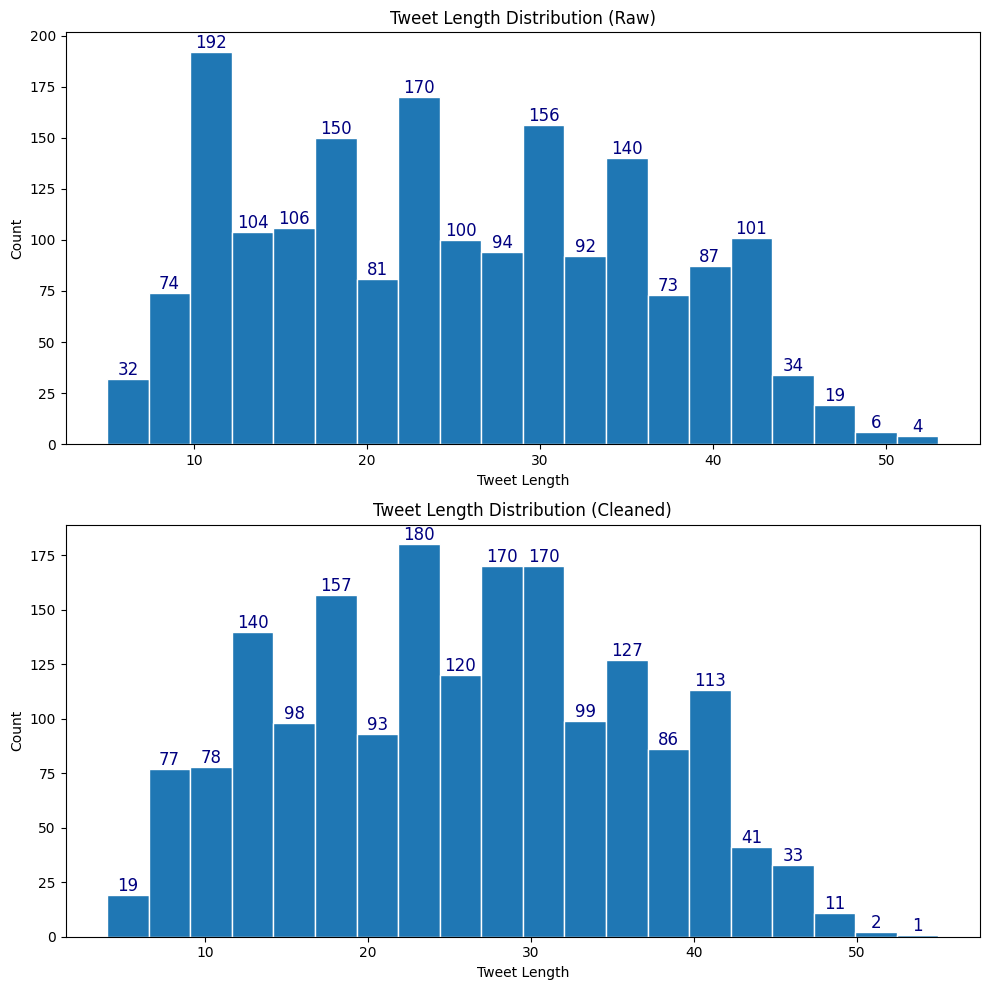

In [133]:
plt.figure(figsize=(10, 10))
len_tweet = tweet_df['tweet'].apply(lambda x: len(x.split()))
len_tweet_clean = tweet_df['cleaned_data'].apply(lambda x: len(x.split()))

plt.subplot(2, 1, 1)
values, bins, bars = plt.hist(len_tweet, edgecolor='white',bins=20)
plt.title('Tweet Length Distribution (Raw)')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=12, color='navy')

plt.subplot(2, 1, 2)
values, bins, bars = plt.hist(len_tweet_clean, edgecolor='white',bins=20)
plt.title('Tweet Length Distribution (Cleaned)')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.bar_label(bars, fontsize=12, color='navy')

plt.tight_layout()
plt.show()

In [58]:
tweet_df['polarity'].value_counts()

polarity
Neutral              1643
Weakly Positive        56
Negative               43
Weakly Negative        42
Positive               17
Strongly Positive      11
Strongly Negative       2
Name: count, dtype: int64

In [18]:
tweet_df.dtypes

Unnamed: 0       int64
sentimen        object
tweet           object
cleaned_data    object
polarity        object
dtype: object

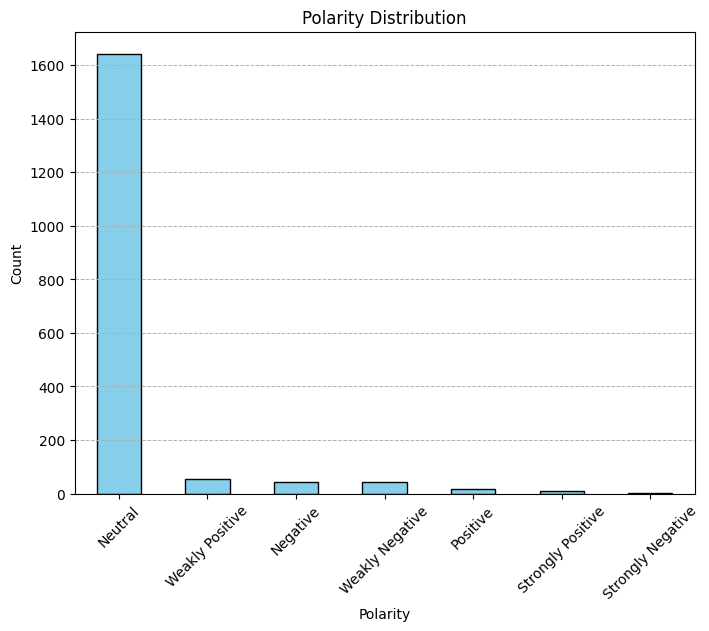

In [134]:
# Count the occurrences of each polarity
polarity_counts = tweet_df['polarity'].value_counts()

# Create a bar plot for the polarity distribution
plt.figure(figsize=(8, 6))
polarity_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

In [87]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

NoOfTerms = len(tweet_df['cleaned_data'])
print(NoOfTerms)

neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(NoOfTerms):
    original_text = str(tweet_df['cleaned_data'][i])

    stemmed_text = stemmer.stem(original_text)

    textblob = TextBlob(stemmed_text)
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1

print("Neutral:", neutral)
print("Weakly Positive:", wpositive)
print("Strongly Positive:", spositive)
print("Positive:", positive)
print("Negative:", negative)
print("Weakly Negative:", wnegative)
print("Strongly Negative:", snegative)


1815
Neutral: 1623
Weakly Positive: 66
Strongly Positive: 11
Positive: 17
Negative: 60
Weakly Negative: 35
Strongly Negative: 2


In [88]:
# finding average reaction
polarity = polarity / NoOfTerms
print(polarity)

-0.0018639484176674259


In [62]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [89]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [90]:
 # printing out data
print("How people are reacting by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting by analyzing 1815 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Negative

------------------------------------------------------------------------------------------

Detailed Report: 
0.94% people thought it was positive
3.64% people thought it was weakly positive
0.61% people thought it was strongly positive
3.31% people thought it was negative
1.93% people thought it was weakly negative
0.11% people thought it was strongly negative
89.42% people thought it was neutral


In [91]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

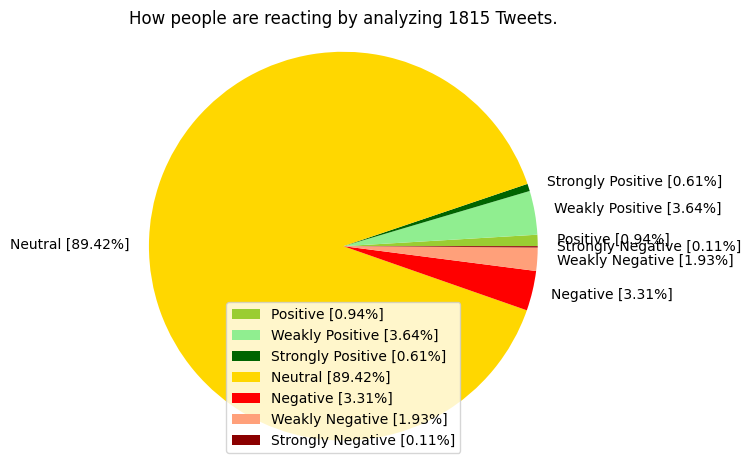

In [92]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Word Cloud Polarity

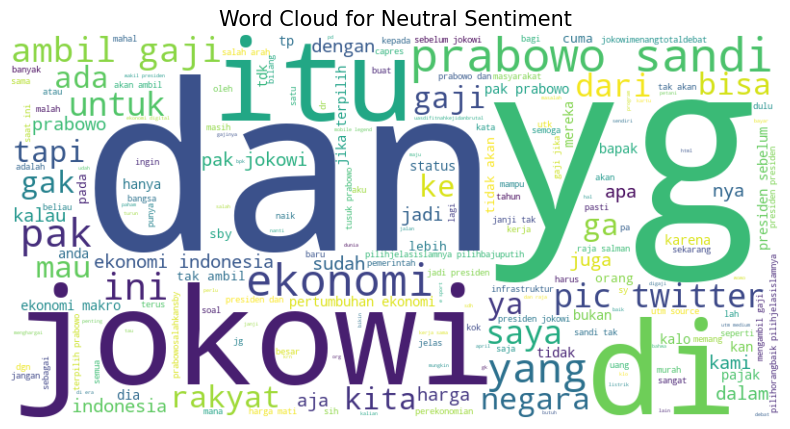

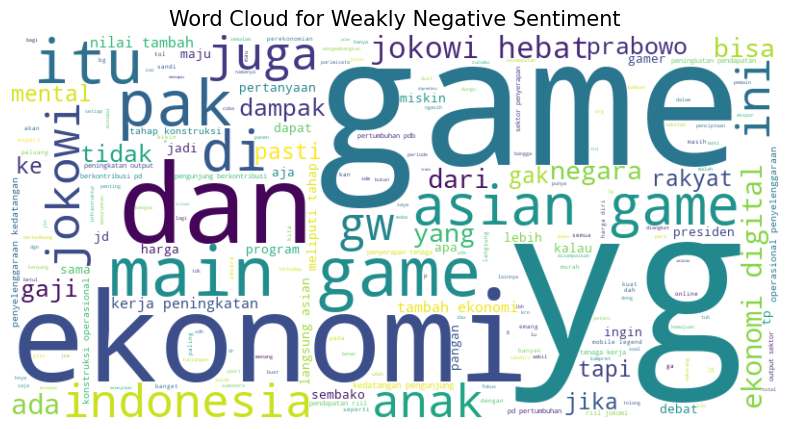

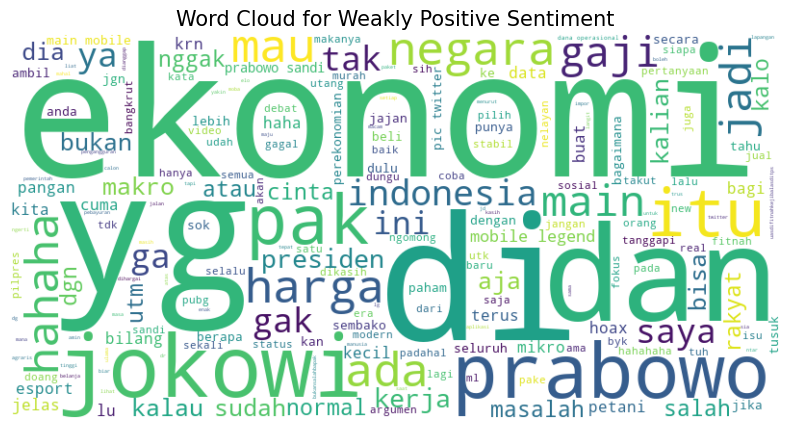

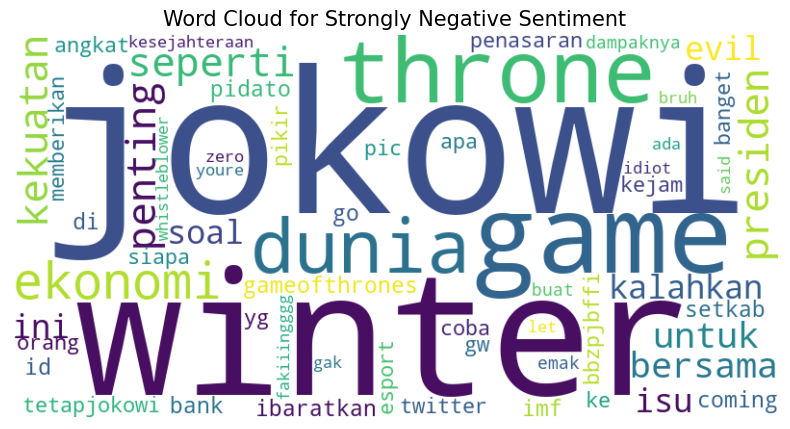

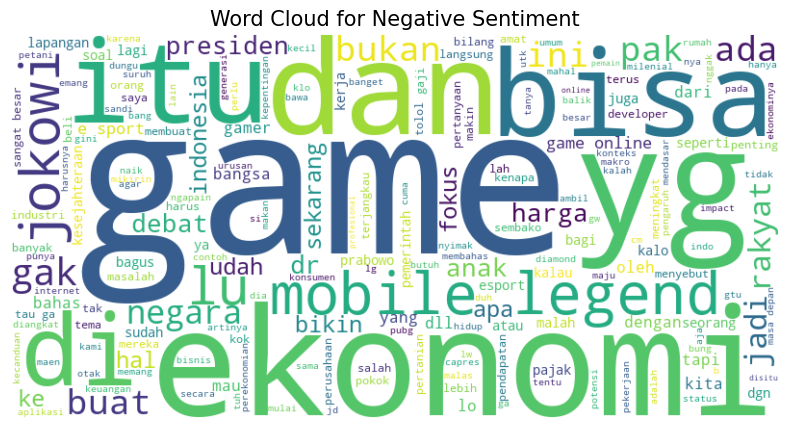

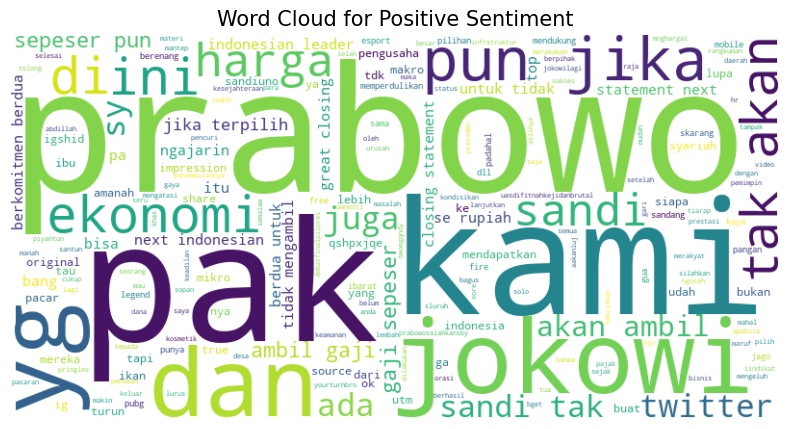

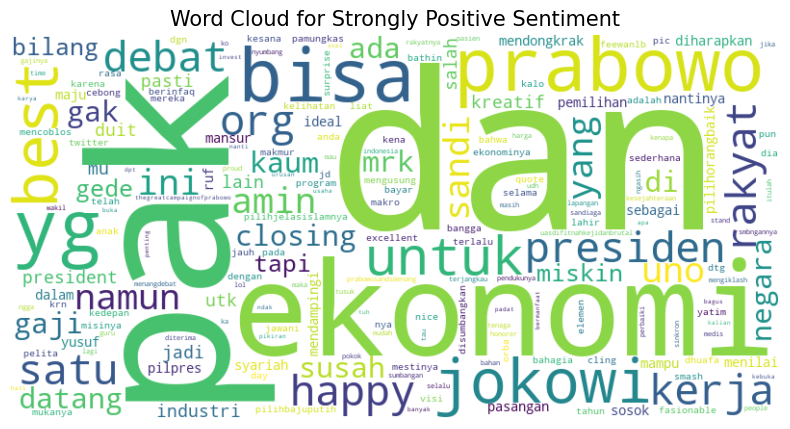

No data available to generate word cloud for None Sentiment


In [131]:
from wordcloud import WordCloud

# Fungsi untuk membuat word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# Buat word cloud untuk setiap kelas sentimen
polarities = tweet_df['polarity'].unique()

for polarity in polarities:
    text = " ".join(tweet for tweet in tweet_df[tweet_df['polarity'] == polarity]['cleaned_data'])
    if text:  # Check if text is not empty
        generate_wordcloud(text, f'Word Cloud for {polarity} Sentiment')
    else:
        print(f'No data available to generate word cloud for {polarity} Sentiment')

# MODEL Development, Evaluation and Metrics

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

tweet_df.info()

# print(tweet_df['polarity'].unique())
# print(tweet_df['polarity'].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1815 non-null   int64 
 1   sentimen          1815 non-null   object
 2   tweet             1815 non-null   object
 3   cleaned_data      1815 non-null   object
 4   polarity          1814 non-null   object
 5   polarity_encoded  1815 non-null   int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 78.1+ KB


In [104]:
# Custom precision metric
import tensorflow as tf
def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

# Custom recall metric
def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Custom f1 score metric
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

In [105]:
label_encoder = LabelEncoder()
tweet_df['polarity_encoded'] = label_encoder.fit_transform(tweet_df['polarity'])

# Prepare the data
X = tweet_df['cleaned_data']  # The text data
y = tweet_df['polarity_encoded']  # The encoded polarity labels

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)


# Create a pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.90


In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

In [112]:

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words based on your vocabulary size
tokenizer.fit_on_texts(tweet_df['cleaned_data'])
sequences = tokenizer.texts_to_sequences(tweet_df['cleaned_data'])

# Pad sequences
max_length = max(len(x) for x in sequences)  # You can choose a different strategy for the max length
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to categorical (one-hot encoding)
y = to_categorical(tweet_df['polarity_encoded'])

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)


# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16),  # Adjust embedding layer parameters
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer nodes equal to the number of classes
])

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_m, precision_m, recall_m])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7506 - f1_m: 0.0116 - loss: 1.8194 - precision_m: 0.0333 - recall_m: 0.0076 - val_accuracy: 0.9011 - val_f1_m: 0.6873 - val_loss: 0.8614 - val_precision_m: 0.9625 - val_recall_m: 0.5388
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - f1_m: 0.7904 - loss: 0.7212 - precision_m: 0.9253 - recall_m: 0.7016 - val_accuracy: 0.9011 - val_f1_m: 0.8951 - val_loss: 0.4924 - val_precision_m: 0.9077 - val_recall_m: 0.8832
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - f1_m: 0.9038 - loss: 0.4735 - precision_m: 0.9153 - recall_m: 0.8929 - val_accuracy: 0.9011 - val_f1_m: 0.8937 - val_loss: 0.4685 - val_precision_m: 0.9047 - val_recall_m: 0.8832
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - f1_m: 0.8882 - loss: 0.5324 - precision_m: 0.8981 - recall_m: 0.8788 - val_accuracy: 0.9011 - val_f1_m: 0.8937 - val_loss: 0.4573 - val_precision_m: 0.9047 - val_recall_m: 0.8832


In [120]:
_precision = history.history['precision_m'][-1]
_test_precision = history.history['val_precision_m'][-1]

_recall = history.history['recall_m'][-1]
_test_recall = history.history['val_recall_m'][-1]

_f1 = history.history['f1_m'][-1]
_test_f1 = history.history['val_f1_m'][-1]

columns_metrics = ['model_name','stage','precision','recall','f1']
_metrics_train = ['seq','train',_precision,_recall,_f1]
_metrics_test = ['seq','test',_test_precision,_test_recall,_test_f1]
_metrics_validation = ['seq','validation',precision,recall,f1_score]


df_metrics = pd.DataFrame([_metrics_train,_metrics_test,_metrics_validation],columns=columns_metrics)
df_metrics

,model_name,stage,precision,recall,f1
0,seq,train,0.908895,0.900924,0.904810
1,seq,test,0.905690,0.897059,0.901265
2,seq,validation,0.905690,0.897059,0.901265


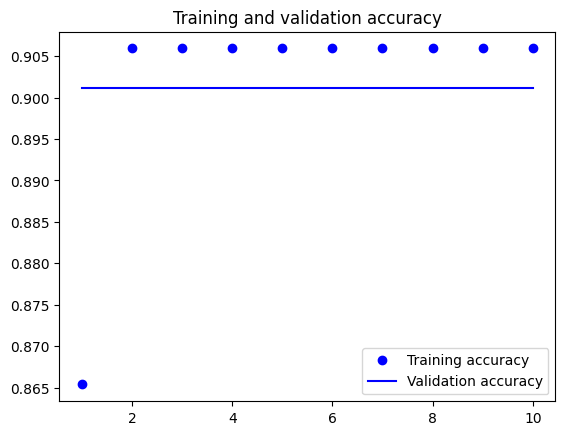

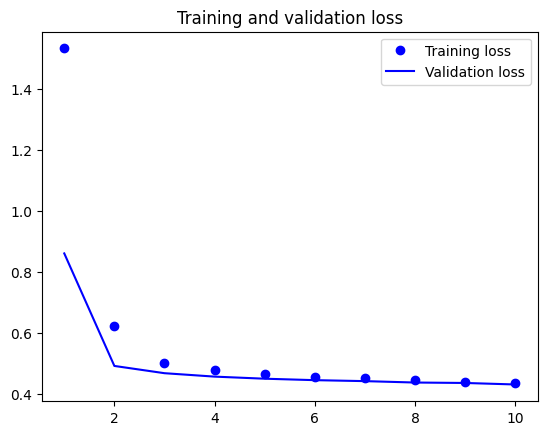

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()